In [38]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../')
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import core.config as conf
%matplotlib inline

In [218]:
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.size"] = 12

In [219]:
filepath = '../data/iem_info_20210902.csv'
iem_df = pd.read_csv(filepath)

In [295]:
iem_df.head()

,iem_cd,iem_krl_nm,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd
0,A000020,동화약품,8,2,99
1,A000080,하이트진로,14,2,1
2,A000180,성창기업지주,5,3,99
3,A000227,유유제약2우B,8,99,99
4,A000325,노루홀딩스우,2,99,99


### iem_info.csv(3,078건): 종목 정보
- iem_cd: 종목코드
- iem_krl_nm: 종목한글명
- btp_cfc_cd: 종목업종
- mkt_pr_tal_scl_tp_cd: 시가총액 규모유형
- stk_dit_cd: 시장구분

In [221]:
len(iem_df) 

3079

3078건 아니고 3079건이 맞는 듯

### btp_cfc_cd: 종목업종
14개 업종<Br>
01: 건설 &nbsp; 02: 금융 &nbsp; 03: 기계 &nbsp; 04: 통신 &nbsp; 05: 서비스 &nbsp;
06: 운송 &nbsp; 07: 유통 &nbsp;<br>
08: 의료 &nbsp; 09: 전기 &nbsp; 10: 제조 &nbsp; 11: 철강 &nbsp; 12: 화학 &nbsp;&nbsp;&nbsp;&nbsp; 13: IT &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 14: 기타 

In [199]:
count = iem_df['btp_cfc_cd'].value_counts().sort_index()

In [200]:
count

1      61
2     211
3      43
4      22
5     203
6      95
7     150
8      57
9      82
10    666
11     78
12    121
13    455
14    835
Name: btp_cfc_cd, dtype: int64

In [405]:
btp_cfc_dic = {1:'건설',2:'금융',3:'기계',4:'통신',5:'서비스',6:'운송',7:'유통',8:'의료',9:'전기',10:'제조',11:'철강',12:'화학',13:'IT',14:'기타'}

In [202]:
temp = pd.DataFrame({'code':btp_cfc_dic.keys(),'industry':btp_cfc_dic.values(),'count':count})

In [203]:
temp.sort_values('count',ascending=False)

,code,industry,count
14,14,기타,835
10,10,제조,666
13,13,IT,455
2,02,금융,211
5,05,서비스,203
7,07,유통,150
12,12,화학,121
6,06,운송,95
9,09,전기,82
11,11,철강,78


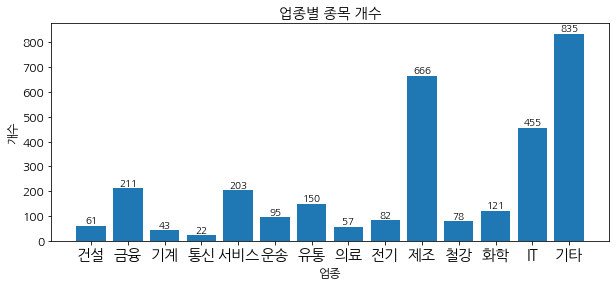

In [204]:
label= list(btp_cfc_dic.values())
idx = np.arange(len(label))
plt.bar(idx, count)
plt.title('업종별 종목 개수')
plt.xlabel('업종')
plt.ylabel('개수')
plt.xticks(idx, label, fontsize=15)

for i,v in enumerate(count):
    plt.text(i,v,str(v), fontsize=10, horizontalalignment='center',verticalalignment="bottom")

plt.show()

### mkt_pr_tal_scl_tp_cd: 시가총액 규모유형
01: 대형주  &nbsp;&nbsp; 02: 중형주 &nbsp;&nbsp; 03: 소형주 &nbsp;&nbsp; 99: 기타

In [390]:
mkt_pr_dic = {1:'대형주',2:'중형주',3:'소형주',99:'기타'}

In [391]:
count = iem_df['mkt_pr_tal_scl_tp_cd'].value_counts().sort_index()

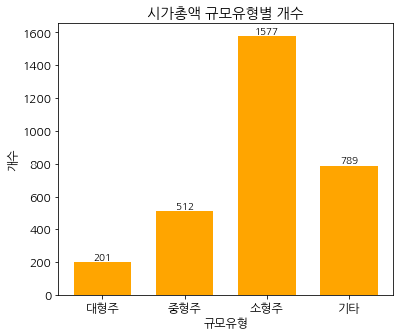

In [392]:
label= list(mkt_pr_dic.values())
idx = np.arange(len(label))
plt.figure(figsize=(6,5))
plt.bar(idx, count, width=0.7, color="orange")
plt.title('시가총액 규모유형별 개수')
plt.xlabel('규모유형')
plt.ylabel('개수')
plt.xticks(idx, label)

for i,v in enumerate(count):
    plt.text(i,v,str(v), fontsize=10, horizontalalignment='center',verticalalignment="bottom")
    
plt.show()

### stk_dit_cd: 시장구분
01: 코스피200 &nbsp;&nbsp; 02: 코스닥150 &nbsp;&nbsp; 99: 기타

In [393]:
stk_dit_dic={1:'코스피200',2:'코스닥150',99:'기타'}

In [394]:
count = iem_df['stk_dit_cd'].value_counts().sort_index()

In [395]:
count

1      201
2      150
99    2728
Name: stk_dit_cd, dtype: int64

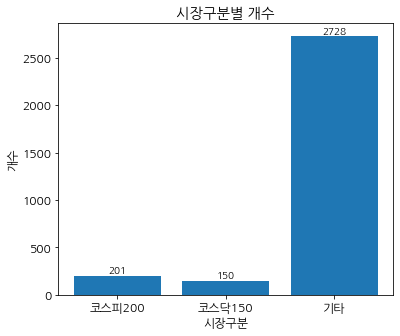

In [396]:
label= list(stk_dit_dic.values())
idx = np.arange(len(label))
plt.figure(figsize=(6,5))
plt.bar(idx, count)
plt.title('시장구분별 개수')
plt.xlabel('시장구분')
plt.ylabel('개수')
plt.xticks(idx, label)


for i,v in enumerate(count):
    plt.text(i,v,str(v), fontsize=10, horizontalalignment='center',verticalalignment="bottom")

plt.show()

# 항목 두개씩 분석

- iem_cd: 종목코드
- iem_krl_nm: 종목한글명
- btp_cfc_cd: 종목업종
- mkt_pr_tal_scl_tp_cd: 시가총액 규모유형
- stk_dit_cd: 시장구분

In [298]:
iem_df2 = iem_df[['btp_cfc_cd','mkt_pr_tal_scl_tp_cd']]

In [304]:
iem_df2

,btp_cfc_cd,mkt_pr_tal_scl_tp_cd
0,8,2
1,14,2
2,5,3
3,8,99
4,2,99
...,...,...
3074,14,99
3075,14,99
3076,14,99
3077,14,99


### 업종별 시가총액 규모유형
- btp_cfc_cd: 종목업종
- mkt_pr_tal_scl_tp_cd: 시가총액 규모유형

In [408]:
btp_cfc_value = list(btp_cfc_dic.values())
btp_cfc_key = list(btp_cfc_dic.keys())

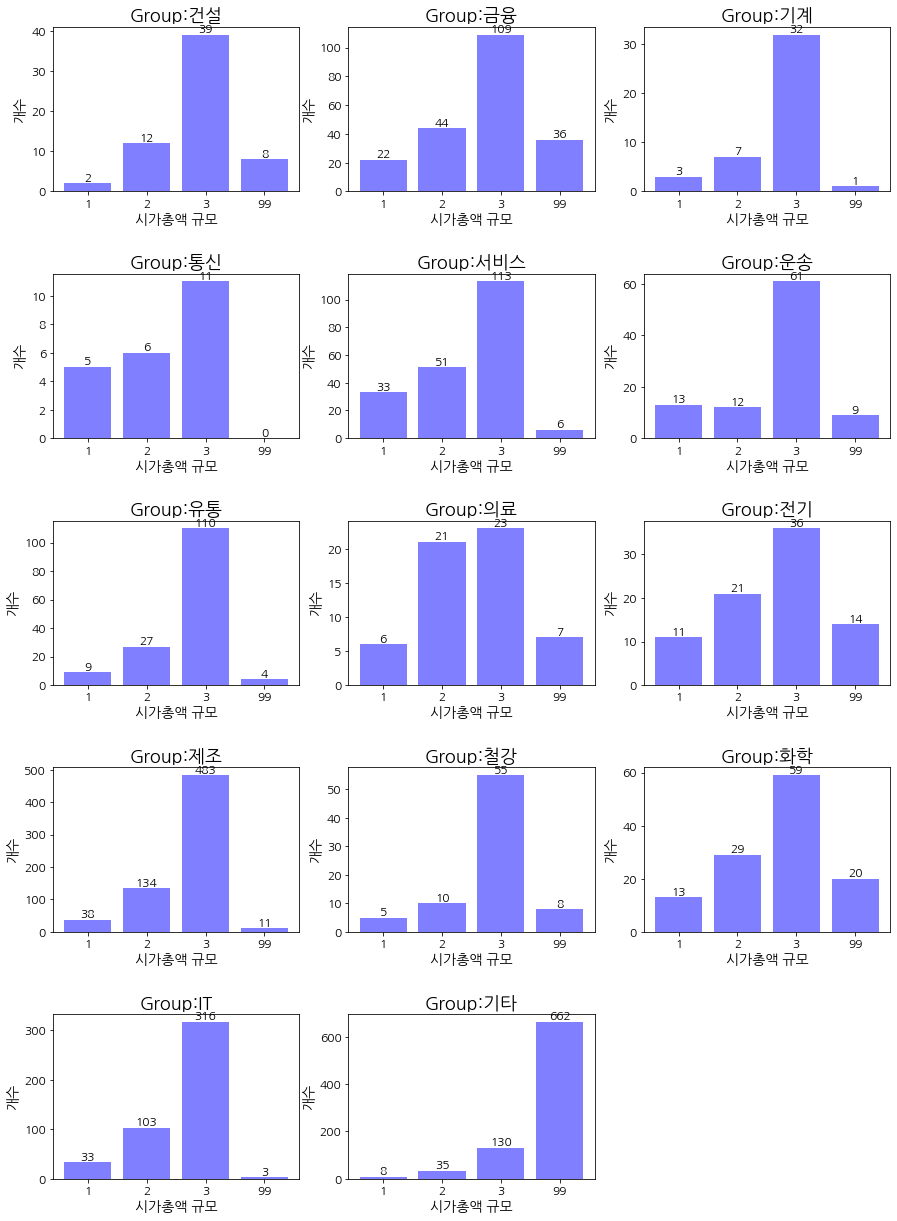

In [409]:
plt.figure(figsize = (15, 20)) # 캔버스의 크기 조절 가능 (가로, 세로)

for i, key in enumerate(btp_cfc_key):
    query1 = iem_df2['btp_cfc_cd'] == i+1
    # 01: 대형주    02: 중형주    03: 소형주    99: 기타
    query2 = iem_df2['mkt_pr_tal_scl_tp_cd'] == 1
    query3 = iem_df2['mkt_pr_tal_scl_tp_cd'] == 2
    query4 = iem_df2['mkt_pr_tal_scl_tp_cd'] == 3
    query5 = iem_df2['mkt_pr_tal_scl_tp_cd'] == 99
    temp2 = [len(iem_df2[query1 & query2]),len(iem_df2[query1 & query3]),len(iem_df2[query1 & query4]),len(iem_df2[query1 & query5])]

    plt.subplot(5,3, i+1)
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.5)
    for j,v in enumerate(temp2):
        plt.text(j,v,str(v), fontsize=12, horizontalalignment='center',verticalalignment="bottom")

    plt.bar(['1','2','3','99'], temp2, color='blue', alpha=0.5)

    plt.title('Group:'+ btp_cfc_value[i] ,fontsize=18)
    plt.xlabel('시가총액 규모', fontsize=14)
    plt.ylabel('개수', fontsize=14)
#    plt.ylim([0,650]) # y축 값을 동일하게 해서 보고싶으면 주석풀어서 돌리면 됨.
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)


## 시가총액 규모별 업종

In [399]:
mkt_pr_value = list(mkt_pr_dic.values())
mkt_pr_key = list(mkt_pr_dic.keys())

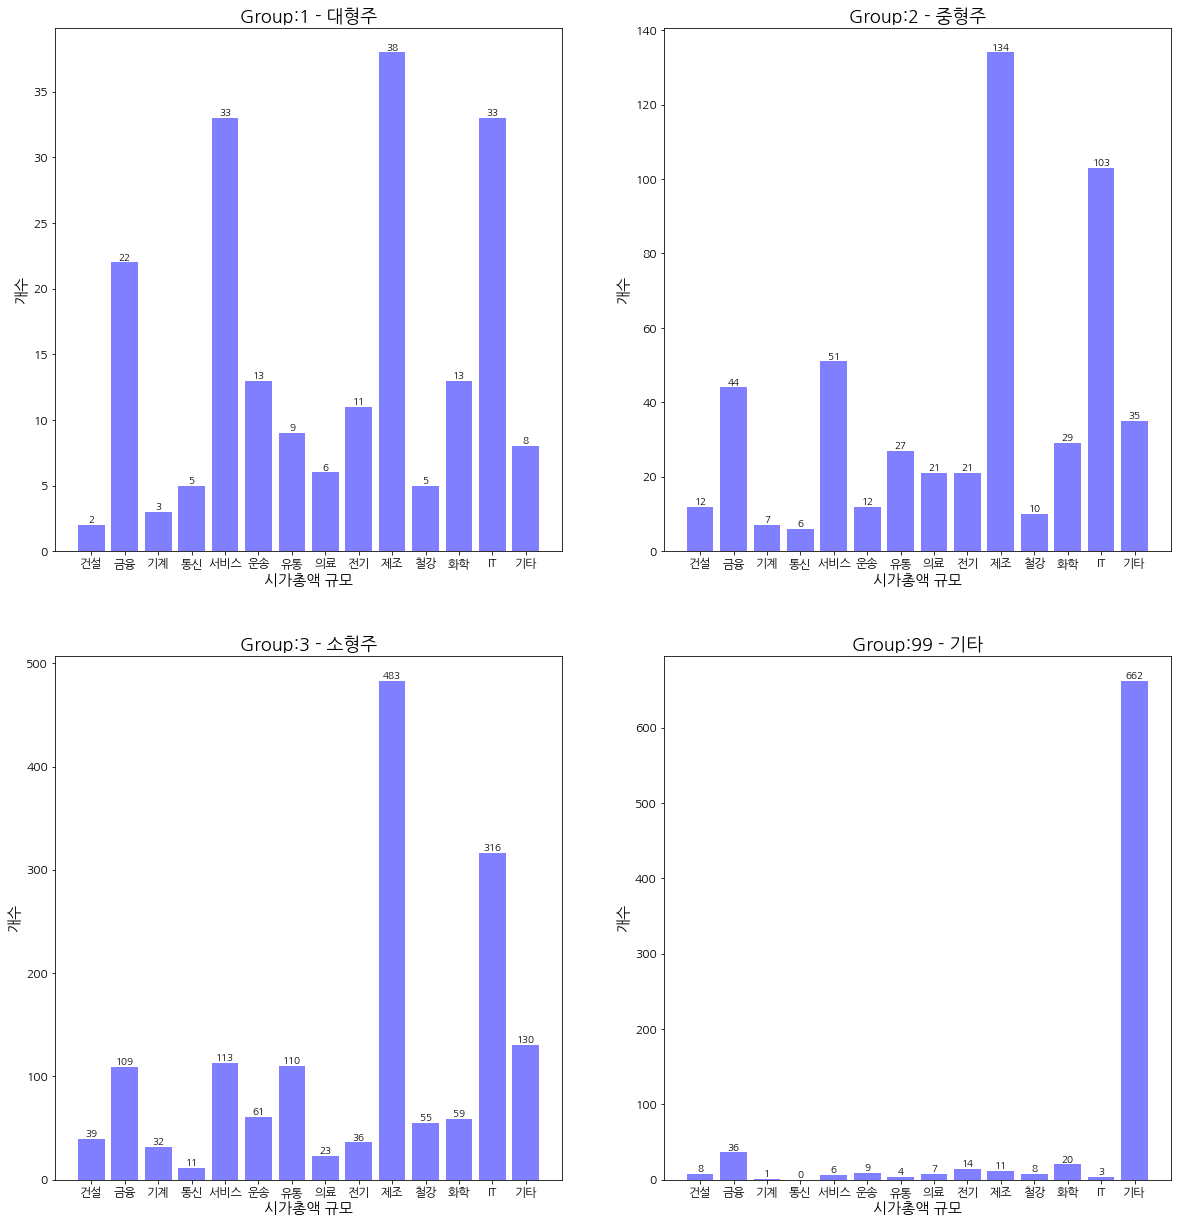

In [454]:
plt.figure(figsize = (20,20)) # 캔버스의 크기 조절 가능 (가로, 세로)

for i, key in enumerate(mkt_pr_key):
    query1 = iem_df2['mkt_pr_tal_scl_tp_cd'] == key
    temp2 = []
    for j in range(len(btp_cfc_key)):
        query2 = iem_df2['btp_cfc_cd'] == j+1
        temp2.append(len(iem_df2[query1 & query2]))
    plt.subplot(2,2, i+1)
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.2)
    
    for j,v in enumerate(temp2):
        plt.text(j,v,str(v), fontsize=10, horizontalalignment='center',verticalalignment="bottom")

    x_bar = ['건설','금융','기계','통신','서비스','운송','유통','의료','전기','제조','철강','화학','IT','기타']    
    x_bar_num = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14']
    plt.bar(x_bar, temp2, color='blue', alpha=0.5)

    plt.title('Group:'+ str(key) +' - '+ mkt_pr_dic[key] ,fontsize=18)
    plt.xlabel('시가총액 규모', fontsize=15)
    plt.ylabel('개수', fontsize=15)
#    plt.ylim([0,650]) # y축 값을 동일하게 해서 보고싶으면 주석풀어서 돌리면 됨.
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
